<a id='dr'></a>
# data restructure

- pandas provides two standardized data structures for tabular data
  - Series — A one-dimensional structure, used to represent a vector, i.e., a table column
  - DataFrame — A two-dimensional structure, used to represent a table
each column in a DataFrame is a Series

- pandas is an extension of numpy
- series are labelled numpy arrays that represent table columns

[libraries](#dr-libraries)   
[variables](#dr-variables)    
[directories](#dr-directories)   
[import](#dr-import)  
[explore](#dr-explore)  
[combine](#dr-combine)  
[melt](#dr-melt)  
[nulls](#dr-nulls)  
[map](#dr-map)  
[columns](#dr-columns)  
[filter](#dr-filter)  
[index](#dr-index)  
[pivot](#dr-pivot)  
[plot](#dr-plot)  
[export](#dr-export)  

## project

In [1]:
project_id = 'gta'

<a id='dr-libraries'></a>
## libraries

[Return to Start of Notebook](#dr)  

In [2]:
import os
import glob
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import warnings # to ignore warnings
from functools import partial # for shorter traceback error messages
from IPython.core.interactiveshell import InteractiveShell # to automtically show cell output

In [4]:
from pandas.api.types import CategoricalDtype

### parameters

In [5]:
# ignore warnings 
warnings.filterwarnings('ignore')

In [6]:
# shorter traceback error messages
get_ipython().showtraceback = partial(get_ipython().showtraceback,exception_only=True)

In [7]:
# shows result of cell without needing print
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"

In [8]:
pd.set_option('display.max_rows',12)
#defaults: pd.set_option('display.max_columns',20,'display.max_rows',60,'display.max_colwidth',50)

In [9]:
# pandas 
pd.options.display.float_format = '{:.1f}'.format

#defaults: pd.set_option('display.max_columns',20,'display.max_rows',60,'display.max_colwidth',50)
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',10)
pd.set_option('display.max_colwidth',20)

In [10]:
plt.rcParams['figure.figsize'] = (4, 2)
plt.rcParams['figure.dpi'] = 144

<a id='dr-variables'></a>
## variables

[Return to Start of Notebook](#dr)  

In [11]:
months = [month for month in calendar.month_abbr if month]

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [12]:
seasons = ['Spring', 'Summer', 'Autumn','Winter']

['Spring', 'Summer', 'Autumn', 'Winter']

In [13]:
# create dictionary to assign seasons to months
months_season_dict = {}
for i, month in enumerate(months):
    if i in (0, 1, 11):
        months_season_dict[month] = 'Winter'
    elif i in (2, 3, 4):
        months_season_dict[month] = 'Spring'
    elif i in (5, 6, 7):
        months_season_dict[month] = 'Summer'        
    elif i in (8, 9, 10):
        months_season_dict[month] = 'Autumn' 

In [14]:
months_season_dict

{'Jan': 'Winter',
 'Feb': 'Winter',
 'Mar': 'Spring',
 'Apr': 'Spring',
 'May': 'Spring',
 'Jun': 'Summer',
 'Jul': 'Summer',
 'Aug': 'Summer',
 'Sep': 'Autumn',
 'Oct': 'Autumn',
 'Nov': 'Autumn',
 'Dec': 'Winter'}

<a id='dr-directories'></a>
## directories

[Return to Start of Notebook](#dr)  

In [15]:
home_dir = os.path.expanduser("~")
project_dir = os.path.join(home_dir, project_id)
data_dir = os.path.join(project_dir, 'data')
raw_data_dir = os.path.join(data_dir, 'raw-data')
restructured_data_dir = os.path.join(data_dir, 'restructured-data')

'/Users/rkforest/gta/data/restructured-data'

In [16]:
def create_directory(directory_name):
    if not os.path.exists(directory_name):
        print('Created new directory: ', directory_name)
        os.mkdir(directory_name)

In [17]:
create_directory(restructured_data_dir)

In [18]:
os.chdir(project_dir)
os.getcwd()

'/Users/rkforest/gta'

### paths

In [19]:
file_paths_csv =  sorted(glob.glob(os.path.join(raw_data_dir, '*.csv')))
[print(path) for path in file_paths_csv];

/Users/rkforest/gta/data/raw-data/GLB.Ts+dSST.csv
/Users/rkforest/gta/data/raw-data/NH.Ts+dSST.csv
/Users/rkforest/gta/data/raw-data/SH.Ts+dSST.csv
/Users/rkforest/gta/data/raw-data/ZonAnn.Ts+dSST.csv


<a id='dr-import'></a>
## import

[Return to Start of Notebook](#dr)  

- skiprows  
- sep  
- usecols  
- parse_dates  
- index_col (can also use integer of column)
- na_values  
- nrows  
- delim_whitespace

#### columns list
- initial read for columns

In [20]:
df = pd.read_csv(file_paths_csv[0], skiprows=1)
df.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON'],
      dtype='object')

In [21]:
def read_raw_data(file_id, file_path, value_type):
     
    # initial read for columns
    df = pd.read_csv(file_path, skiprows=1) 
    df_cols = list(df.columns)
    
    if value_type == 'M':
        # months Jan thru Dec
        cols_to_import  = df_cols[:13]
  
    elif value_type == 'S':
        # seasons
        cols_to_import = df_cols[15:]
        cols_to_import.insert(0,df_cols[0])

    elif value_type == 'Y':
        # yearly
        cols_to_import = df_cols[13:14]
        cols_to_import.insert(0,df_cols[0])
        
    df = pd.read_csv(
            file_path,
            usecols=cols_to_import,   
            parse_dates=['Year'], 
            sep=',',
            skiprows=1,
            na_values=['***'],
            delim_whitespace=False
    )
        
    df['area'] = file_id
    
    return df

#### monthly values

In [22]:
df_glb_monthly = read_raw_data('GLB', file_paths_csv[0], 'M')
df_glb_monthly.head(1)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,area
0,1880-01-01,-0.2,-0.2,-0.1,-0.2,-0.1,-0.2,-0.2,-0.1,-0.1,-0.2,-0.2,-0.2,GLB


In [23]:
df_nh_monthly = read_raw_data('NH', file_paths_csv[1], 'M')
df_nh_monthly.head(1)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,area
0,1880-01-01,-0.4,-0.5,-0.2,-0.3,-0.1,-0.2,-0.2,-0.3,-0.2,-0.3,-0.4,-0.4,NH


In [24]:
df_sh_monthly = read_raw_data('SH', file_paths_csv[2], 'M')
df_sh_monthly.head(1)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,area
0,1880-01-01,0.0,0.0,0.1,-0.0,-0.1,-0.2,-0.2,0.1,-0.1,-0.1,0.0,0.1,SH


#### seasonal values

In [25]:
df_glb_seasonal = read_raw_data('GLB', file_paths_csv[0], 'S')
df_glb_seasonal.head(1)

,Year,DJF,MAM,JJA,SON,area
0,1880-01-01,NaN,-0.1,-0.2,-0.2,GLB


#### yearly values

In [26]:
df_glb_annual = read_raw_data('GLB', file_paths_csv[0], 'Y')
df_glb_annual .head(1)

,Year,J-D,area
0,1880-01-01,-0.2,GLB


#### zonal values

In [27]:
df_zonal = pd.read_csv(file_paths_csv[3])
df_zonal.head(1)

,Year,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
0,1880,-0.2,-0.3,-0.1,-0.4,-0.1,-0.0,-0.8,-0.5,-0.3,-0.1,-0.1,-0.0,0.1,0.7


<a id='dr-explore'></a>
## explore

[Return to Start of Notebook](#dr)  

Minimally sufficient pandas:  
- attributes  
  - shape, dtypes, columns, index, values  
- methods
  - isna, notna, idxmax, idxmin, nunique, value_counts
- other 
  - info, len, unique

### info
df.info(memory_usage='deep')

In [28]:
df_glb_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    144 non-null    datetime64[ns]
 1   Jan     144 non-null    float64       
 2   Feb     144 non-null    float64       
 3   Mar     144 non-null    float64       
 4   Apr     143 non-null    float64       
 5   May     143 non-null    float64       
 6   Jun     143 non-null    float64       
 7   Jul     143 non-null    float64       
 8   Aug     143 non-null    float64       
 9   Sep     143 non-null    float64       
 10  Oct     143 non-null    float64       
 11  Nov     143 non-null    float64       
 12  Dec     143 non-null    float64       
 13  area    144 non-null    object        
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 15.9+ KB


### shape

In [29]:
df_glb_monthly.shape

(144, 14)

In [30]:
nrows = df_glb_monthly.shape[0]

144

In [31]:
ncols = df_glb_monthly.shape[1]

14

In [32]:
nrows = len(df_glb_monthly)

144

### dtypes
returns series

In [33]:
df_glb_monthly.dtypes

Year    datetime64[ns]
Jan            float64
Feb            float64
Mar            float64
Apr            float64
             ...      
Sep            float64
Oct            float64
Nov            float64
Dec            float64
area            object
Length: 14, dtype: object

In [34]:
df_glb_monthly.dtypes.value_counts()

float64           12
datetime64[ns]     1
object             1
Name: count, dtype: int64

### columns

In [35]:
cols = df_glb_monthly.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'area'],
      dtype='object')

In [36]:
cols = list(df_glb_monthly.columns)
print(cols)

['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'area']


### index 
- default index is type RangeIndex

In [37]:
index_values = df_glb_monthly.index

RangeIndex(start=0, stop=144, step=1)

In [38]:
type(df_glb_monthly.index)

pandas.core.indexes.range.RangeIndex

In [39]:
print(df_glb_monthly.index.name)

None


In [40]:
df_glb_monthly.index.max()

143

### values

- pandas has separate numpy arrays for each data type in the df  
- when you access the values attribute, it concatenates them into a single array

values returns a numpy array which can be used to improve performance when selecting single values

In [41]:
type(df_glb_monthly.values)

numpy.ndarray

In [42]:
df_glb_monthly.values[0]

array([Timestamp('1880-01-01 00:00:00'), -0.18, -0.24, -0.09, -0.16, -0.1,
       -0.21, -0.18, -0.1, -0.15, -0.23, -0.22, -0.17, 'GLB'],
      dtype=object)

In [43]:
val_list = df_glb_monthly.values.tolist()
print(val_list[0])

[Timestamp('1880-01-01 00:00:00'), -0.18, -0.24, -0.09, -0.16, -0.1, -0.21, -0.18, -0.1, -0.15, -0.23, -0.22, -0.17, 'GLB']


### isna

#### .isna.sum()

In [44]:
df_glb_monthly.isna().sum().sum() # total in df

9

In [45]:
df_glb_monthly.isna().sum() # count by column

Year    0
Jan     0
Feb     0
Mar     0
Apr     1
       ..
Sep     1
Oct     1
Nov     1
Dec     1
area    0
Length: 14, dtype: int64

In [46]:
df_glb_monthly.isna().sum(axis=1) # count by row (sort first)

0      0
1      0
2      0
3      0
4      0
      ..
139    0
140    0
141    0
142    0
143    9
Length: 144, dtype: int64

#### .isna.any()

In [47]:
df_glb_monthly.isna().any(axis=1).sum() # number of rows

1

In [48]:
filt = df_glb_monthly.isna().any(axis=1)
na_recs = df_glb_monthly.loc[filt]
na_recs.head(3)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,area
143,2023-01-01,0.9,1.0,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GLB


In [49]:
df_glb_monthly.isna().any().sum() # number of columns

9

In [50]:
df_glb_monthly.isna().any() # which columns

Year    False
Jan     False
Feb     False
Mar     False
Apr      True
        ...  
Sep      True
Oct      True
Nov      True
Dec      True
area    False
Length: 14, dtype: bool

In [51]:
df_glb_monthly.isna().any(axis=1) # which rows

0      False
1      False
2      False
3      False
4      False
       ...  
139    False
140    False
141    False
142    False
143     True
Length: 144, dtype: bool

In [52]:
df_glb_monthly.isna().mean().round(3) * 100 # percentage that are nan

Year   0.0
Jan    0.0
Feb    0.0
Mar    0.0
Apr    0.7
        ..
Sep    0.7
Oct    0.7
Nov    0.7
Dec    0.7
area   0.0
Length: 14, dtype: float64

#### notna

In [53]:
df_glb_monthly.notna().sum().sum() # total in df

2007

In [54]:
df_glb_monthly.notna().all(axis=0) # which columns

Year     True
Jan      True
Feb      True
Mar      True
Apr     False
        ...  
Sep     False
Oct     False
Nov     False
Dec     False
area     True
Length: 14, dtype: bool

In [55]:
df_glb_monthly.notna().all(axis=1).tail(3) # which rows

141     True
142     True
143    False
dtype: bool

<a id='dr-combine'></a>
## combine

[Return to Start of Notebook](#dr)  

- pd.concat() for combining DataFrames across rows or columns
- pd.merge() for combining data on common columns or indices
- .join() for combining data on a key column or an index

### concatenate

#### vertical (add new rows): axis=0

In [56]:
dfs_to_concat = [df_glb_monthly,
                 df_nh_monthly,
                 df_sh_monthly]
df_concat_v = pd.concat(dfs_to_concat,
                        ignore_index=True, # will create new index
                        axis=0)
print(len(df_concat_v))

432


In [57]:
df_concat_v.head(1)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,area
0,1880-01-01,-0.2,-0.2,-0.1,-0.2,-0.1,-0.2,-0.2,-0.1,-0.1,-0.2,-0.2,-0.2,GLB


In [58]:
df_concat_v.tail(1)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,area
431,2023-01-01,0.4,0.6,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SH


#### horizontal (add new columns): axis=1

In [59]:
dfs_to_concat = [df_glb_seasonal,
                 df_glb_annual]
df_concat_h = pd.concat(dfs_to_concat,axis=1)
print(len(df_concat_h))

144


In [60]:
df_concat_h.head(1)

,Year,DJF,MAM,JJA,SON,area,Year,J-D,area
0,1880-01-01,NaN,-0.1,-0.2,-0.2,GLB,1880-01-01,-0.2,GLB


### merge

- only joins dfs horizontally
- only exactly two dfs
- has options for inner, left, right, outer, cross
- can use any columns to match the dfs
- will create unique column names
- arguments
  - left—The first (“left”) layer  
  - right—The second (“right”) layer  
  - how—The type of join, one of: "left", "right", "outer", "inner", "cross" (default is "inner")  
  - on—The name of the common column where identical values are considered a “match”

#### verify dfs can merge

In [61]:
print(df_nh_monthly.index.max() == df_sh_monthly.index.max())
print(df_nh_monthly.index.min() == df_sh_monthly.index.min())
print(df_nh_monthly.shape == df_sh_monthly.shape)

True
True
True


#### merge (using columns)

In [62]:
df_merge = pd.merge(df_glb_annual,
                    df_glb_seasonal,
                    how='inner',
                    on = ['Year','area'])
df_merge.head(3)

,Year,J-D,area,DJF,MAM,JJA,SON
0,1880-01-01,-0.2,GLB,NaN,-0.1,-0.2,-0.2
1,1881-01-01,-0.1,GLB,-0.2,0.1,-0.1,-0.2
2,1882-01-01,-0.1,GLB,0.1,-0.1,-0.2,-0.2


#### merge (using index)  

In [63]:
nh_sh_merge = pd.merge(df_glb_annual,
                       df_glb_seasonal,
                       how='inner', 
                       suffixes=['_ann','_ssn'],
                       left_index=True,
                       right_index=True)
nh_sh_merge.head(3)

,Year_ann,J-D,area_ann,Year_ssn,DJF,MAM,JJA,SON,area_ssn
0,1880-01-01,-0.2,GLB,1880-01-01,NaN,-0.1,-0.2,-0.2,GLB
1,1881-01-01,-0.1,GLB,1881-01-01,-0.2,0.1,-0.1,-0.2,GLB
2,1882-01-01,-0.1,GLB,1882-01-01,0.1,-0.1,-0.2,-0.2,GLB


### join

#### join (using columns)

In [64]:
nh_sh_join = df_glb_annual.join(df_glb_monthly.set_index(['Year','area']),                        
                        how='inner',
                        on = ['Year','area'],
                        lsuffix="_ann",
                        rsuffix="_mth",)
nh_sh_join .head(3)

,Year,J-D,area,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1880-01-01,-0.2,GLB,-0.2,-0.2,-0.1,-0.2,-0.1,-0.2,-0.2,-0.1,-0.1,-0.2,-0.2,-0.2
1,1881-01-01,-0.1,GLB,-0.2,-0.1,0.0,0.1,0.1,-0.2,0.0,-0.0,-0.1,-0.2,-0.2,-0.1
2,1882-01-01,-0.1,GLB,0.2,0.1,0.0,-0.2,-0.1,-0.2,-0.2,-0.1,-0.1,-0.2,-0.2,-0.4


#### join (using index)

In [65]:
nh_sh_join = df_glb_annual.join(df_glb_monthly,                        
                        how='inner',
                        lsuffix="_ann",
                        rsuffix="_mth")
nh_sh_join .head(3)

,Year_ann,J-D,area_ann,Year_mth,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,area_mth
0,1880-01-01,-0.2,GLB,1880-01-01,-0.2,-0.2,-0.1,-0.2,-0.1,-0.2,-0.2,-0.1,-0.1,-0.2,-0.2,-0.2,GLB
1,1881-01-01,-0.1,GLB,1881-01-01,-0.2,-0.1,0.0,0.1,0.1,-0.2,0.0,-0.0,-0.1,-0.2,-0.2,-0.1,GLB
2,1882-01-01,-0.1,GLB,1882-01-01,0.2,0.1,0.0,-0.2,-0.1,-0.2,-0.2,-0.1,-0.1,-0.2,-0.2,-0.4,GLB


<a id='dr-melt'></a>
## melt

[Return to Start of Notebook](#dr)  

In [66]:
dfg_melt = pd.melt(df_concat_v,
                        id_vars=['area','Year'],
                        var_name='month', 
                value_name='anomaly')
dfg_melt.head(1)

,area,Year,month,anomaly
0,GLB,1880-01-01,Jan,-0.2


In [67]:
dfg_melt['month'].value_counts()

month
Jan    432
Feb    432
Mar    432
Apr    432
May    432
      ... 
Aug    432
Sep    432
Oct    432
Nov    432
Dec    432
Name: count, Length: 12, dtype: int64

In [68]:
dfz_melt = pd.melt(df_zonal,
                id_vars=['Year'],
                var_name='area', 
                value_name='anomaly')
dfz_melt.head(1)

,Year,area,anomaly
0,1880,Glob,-0.2


<a id='dr-nulls'></a>
## nulls

[Return to Start of Notebook](#dr)  

### np.nan
- stored with numpy's float64 dtype, rather than the less efficient object type
- it also allows for vectorized operations
- can be used as a numerical value in mathematical operations
- contrasts with None, which belongs to class NoneType, and forces an object type

In [69]:
dfcp = dfg_melt.copy();

In [70]:
dfcp.fillna(np.nan);

### .dropna

In [71]:
len(dfg_melt)

5184

In [72]:
dfg_melt.dropna(inplace=True) # use axis=1 to drop columns
len(dfg_melt)

5157

In [73]:
#dfcp.dropna(thresh=3) # row must have at least 4 not null values

### .fillna

#### specify fill value

#### use dictionary

#### from preceding or following value

#### interpolate

<a id='dr-map'></a>
## map

[Return to Start of Notebook](#dr)  

In [74]:
dfg_melt['season'] = dfg_melt['month'].map(months_season_dict) 
dfg_melt.head(1)

,area,Year,month,anomaly,season
0,GLB,1880-01-01,Jan,-0.2,Winter


<a id='dr-columns'></a>
## columns

[Return to Start of Notebook](#dr)  

### rename

In [75]:
col_names = {'Year':'year'}

{'Year': 'year'}

In [76]:
dfg_melt.rename(columns=col_names,inplace=True)
dfg_melt.head(1)

,area,year,month,anomaly,season
0,GLB,1880-01-01,Jan,-0.2,Winter


In [77]:
dfz_melt.rename(columns=col_names,inplace=True)
dfz_melt.head(1)

,year,area,anomaly
0,1880,Glob,-0.2


### add

In [78]:
dfg_melt['year_str'] = \
    dfg_melt['year'].dt.strftime('%Y')
dfg_melt.head(1)

,area,year,month,anomaly,season,year_str
0,GLB,1880-01-01,Jan,-0.2,Winter,1880


In [79]:
dfg_melt['month_str'] = \
    pd.to_datetime(dfg_melt['month'], format='%b').dt.strftime('%m') 
dfg_melt.head(1)

,area,year,month,anomaly,season,year_str,month_str
0,GLB,1880-01-01,Jan,-0.2,Winter,1880,01


In [80]:
dfg_melt['date'] = \
    pd.to_datetime(dfg_melt['year_str'] + \
                   dfg_melt['month_str'], format='%Y%m') 
dfg_melt.head(1)

,area,year,month,anomaly,season,year_str,month_str,date
0,GLB,1880-01-01,Jan,-0.2,Winter,1880,01,1880-01-01


In [81]:
dfg_melt.tail(1)

,area,year,month,anomaly,season,year_str,month_str,date
5182,SH,2022-01-01,Dec,0.5,Winter,2022,12,2022-12-01


### drop

In [82]:
dfg_melt.drop(columns=['year_str','month_str','year'],inplace=True) 
dfg_melt.head(1)

,area,month,anomaly,season,date
0,GLB,Jan,-0.2,Winter,1880-01-01


### reorder

In [83]:
dfg_melt = dfg_melt.reindex(['date','season','month','area','anomaly'], axis=1)
dfg_melt.head(1)

,date,season,month,area,anomaly
0,1880-01-01,Winter,Jan,GLB,-0.2


### sort

In [84]:
dfz_sort_col = df_zonal.sort_index(axis=1) # option: inplace = True
dfz_sort_col.head(1)

,24N-44N,24N-90N,24S-24N,24S-EQU,44N-64N,44S-24S,64N-90N,64S-44S,90S-24S,90S-64S,EQU-24N,Glob,NHem,SHem,Year
0,-0.3,-0.4,-0.1,-0.1,-0.5,-0.0,-0.8,0.1,-0.0,0.7,-0.1,-0.2,-0.3,-0.1,1880


<a id='dr-filter'></a>
## filter

[Return to Start of Notebook](#dr)  

In [85]:
filt = dfg_melt['area'] == 'GLB'
df_glb = dfg_melt[filt]
df_glb.head(1)

,date,season,month,area,anomaly
0,1880-01-01,Winter,Jan,GLB,-0.2


In [86]:
filt = dfg_melt['area'] == 'NH'
df_nh = dfg_melt[filt]
df_nh.head(1)

,date,season,month,area,anomaly
144,1880-01-01,Winter,Jan,NH,-0.4


In [87]:
filt = dfg_melt['area'] == 'SH'
df_sh = dfg_melt[filt]
df_sh.head(1)

,date,season,month,area,anomaly
288,1880-01-01,Winter,Jan,SH,0.0


In [88]:
filt = dfg_melt['area'].isin(["NH","SH"])
df_global_by_hemisphere = dfg_melt[filt]
df_global_by_hemisphere.head(1)

,date,season,month,area,anomaly
144,1880-01-01,Winter,Jan,NH,-0.4


In [89]:
df_global_by_hemisphere.tail(1)

,date,season,month,area,anomaly
5182,2022-12-01,Winter,Dec,SH,0.5


<a id='dr-index'></a>
## index

[Return to Start of Notebook](#dr)  

### set index

In [90]:
df_glb.set_index('date',inplace=True, verify_integrity=True, drop=True)
#df_glb.index = pd.DatetimeIndex(df_glb.index)
df_glb.head(1)

,season,month,area,anomaly
date,,,,
1880-01-01,Winter,Jan,GLB,-0.2


In [91]:
df_nh.set_index('date',inplace=True, verify_integrity=True, drop=True)
df_nh.head(1)

,season,month,area,anomaly
date,,,,
1880-01-01,Winter,Jan,NH,-0.4


In [92]:
df_sh.set_index('date',inplace=True, verify_integrity=True, drop=True)
df_sh.head(1)

,season,month,area,anomaly
date,,,,
1880-01-01,Winter,Jan,SH,0.0


### change index name

In [93]:
df_glb.index.names = ['Date']
df_glb.head(1)

,season,month,area,anomaly
Date,,,,
1880-01-01,Winter,Jan,GLB,-0.2


In [94]:
df_glb.index.names = ['date']
df_glb.head(1)

,season,month,area,anomaly
date,,,,
1880-01-01,Winter,Jan,GLB,-0.2


### reset index

#### creates a new range index

In [95]:
df_glb.reset_index(inplace=True)
df_glb.head(1)

,date,season,month,area,anomaly
0,1880-01-01,Winter,Jan,GLB,-0.2


In [96]:
df_global_by_hemisphere.reset_index(inplace=True,drop=True)

In [97]:
df_global_by_hemisphere.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3438 entries, 0 to 3437
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     3438 non-null   datetime64[ns]
 1   season   3438 non-null   object        
 2   month    3438 non-null   object        
 3   area     3438 non-null   object        
 4   anomaly  3438 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 134.4+ KB


### set index

In [98]:
df_glb.set_index('date',inplace=True,drop=True)
df_glb.head(1)

,season,month,area,anomaly
date,,,,
1880-01-01,Winter,Jan,GLB,-0.2


### sort index
- df.sort_index(ascending=[True,False],inplace=True)

In [99]:
df_glb.sort_index(ascending=False, inplace=True)
df_glb.head(2)

,season,month,area,anomaly
date,,,,
2023-03-01,Spring,Mar,GLB,1.2
2023-02-01,Winter,Feb,GLB,1.0


In [100]:
df_glb.sort_index(inplace=True)
df_glb.head(2)

,season,month,area,anomaly
date,,,,
1880-01-01,Winter,Jan,GLB,-0.2
1880-02-01,Winter,Feb,GLB,-0.2


### .index. date accessor
(cannot use .dt)

In [101]:
df_glb['year'] = df_glb.index.year 
#df_glb['month'] = df_glb.index.month
df_glb = df_glb.reindex(['year','month','season','area','anomaly'], axis=1)
df_glb.head(1)

,year,month,season,area,anomaly
date,,,,,
1880-01-01,1880,Jan,Winter,GLB,-0.2


In [102]:
df_nh['year'] = df_nh.index.year 
#df_nh['month'] = df_nh.index.month
df_nh = df_nh.reindex(['year','month','season','area','anomaly'], axis=1)
df_nh.head(1)

,year,month,season,area,anomaly
date,,,,,
1880-01-01,1880,Jan,Winter,NH,-0.4


In [103]:
df_sh['year'] = df_sh.index.year 
#df_sh['month'] = df_sh.index.month
df_sh = df_sh.reindex(['year','month','season','area','anomaly'], axis=1)
df_sh.head(1)

,year,month,season,area,anomaly
date,,,,,
1880-01-01,1880,Jan,Winter,SH,0.0


<a id='dr-pivot'></a>
## pivot

[Return to Start of Notebook](#dr)  

In [104]:
df_hemisphere_by_month = dfg_melt.pivot(index=['date'],
                  columns=('area'),
                  values='anomaly')
df_hemisphere_by_month.head(3)

area,GLB,NH,SH
date,,,
1880-01-01,-0.2,-0.4,0.0
1880-02-01,-0.2,-0.5,0.0
1880-03-01,-0.1,-0.2,0.1


In [105]:
df_glb_pivot_by_year = df_glb.pivot(index=['year'],
                  columns=('month'),
                  values='anomaly')
df_glb_pivot_by_year= df_glb_pivot_by_year.reindex(months,axis=1)

df_glb_pivot_by_year.head(3)

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1880,-0.2,-0.2,-0.1,-0.2,-0.1,-0.2,-0.2,-0.1,-0.1,-0.2,-0.2,-0.2
1881,-0.2,-0.1,0.0,0.1,0.1,-0.2,0.0,-0.0,-0.1,-0.2,-0.2,-0.1
1882,0.2,0.1,0.0,-0.2,-0.1,-0.2,-0.2,-0.1,-0.1,-0.2,-0.2,-0.4


#### vs concatenate
- can concatenate more than 2 dfs
- will not create unique column name

In [106]:
df_horiz_concat = pd.concat([df_nh,
                             df_sh],axis=1) 
df_horiz_concat.head(1)

,year,month,season,area,anomaly,year,month,season,area,anomaly
date,,,,,,,,,,
1880-01-01,1880,Jan,Winter,NH,-0.4,1880,Jan,Winter,SH,0.0


<a id='dr-plot'></a>
## plot

[Return to Start of Notebook](#dr)  

<Axes: xlabel='date'>

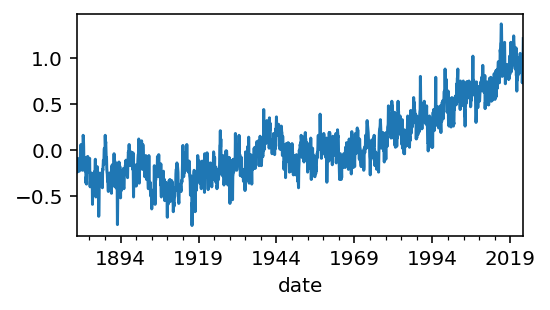

In [107]:
df_glb["anomaly"].plot()

<Axes: xlabel='date'>

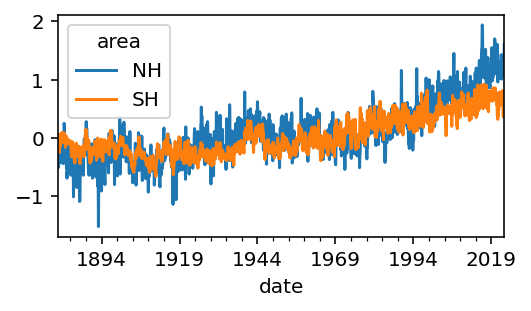

In [108]:
df_hemisphere_by_month[["NH", "SH"]].plot()

<Axes: xlabel='NH', ylabel='SH'>

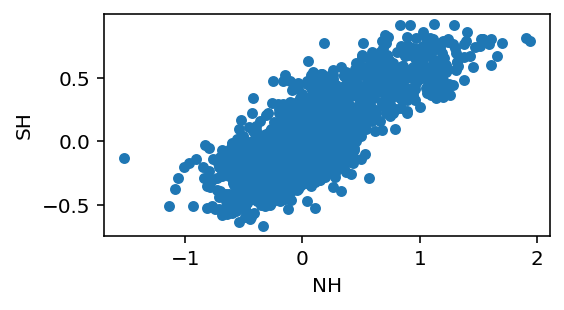

In [109]:
df_hemisphere_by_month.plot.scatter(x = "NH", y = "SH")

<a id='dr-export'></a>
## export

[Return to Start of Notebook](#dr)  

In [126]:
def export_file(file_id, df, index = False):
    save_path = os.path.join(restructured_data_dir,
                             file_id + '.csv')
    df.to_csv(save_path,
              header=True,
              index=index,
              sep=',',
              na_rep='NULL',
              float_format="%.2f")

In [127]:
export_file('global_tabular_by_month',df_glb, index=True)

In [128]:
export_file('hemisphere_tabular_by_month',df_global_by_hemisphere)

In [129]:
export_file('zonal_tabular_by_year',dfz_melt)